In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from main_preprocess import output_path_lung_wov_attenuation as input_attenuation


### Load data of attenuation arrays with vessels

In [2]:
# List the files in the Attenuation directory
attenuation_list = os.listdir('Attenuation_with_vessels')
rows = []
for file in attenuation_list:
    arr = np.load('Attenuation_with_vessels/' + file)  # Load the attenuation data
    patient_id = file[27:29]  # Extract patient ID from the filename
    new_row = {
        'Attenuation': arr,
        'patient': patient_id,
        'label': 'sick' if int(patient_id) < 14 else 'healthy',
        'average_attenuation': np.mean(arr)
    }
    rows.append(new_row)

df_with_vessels = pd.DataFrame(rows).sort_values('patient')
df_with_vessels = df_with_vessels.reset_index(drop=True)
df_with_vessels

,Attenuation,patient,label,average_attenuation
0,"[-197, -91, 54, 205, 358, -223, -51, 156, 274,...",00,sick,-779.527598
1,"[429, 399, 307, 174, 14, -53, -61, 260, 159, 5...",01,sick,-818.110010
2,"[-278, -277, -259, -209, -161, -108, -50, -329...",02,sick,-821.010155
3,"[132, 275, -82, 146, -165, -44, -276, -160, -3...",03,sick,-779.668961
4,"[232, 200, 203, 143, 110, 40, 264, 169, 141, 1...",04,sick,-815.145992
5,"[-235, -189, -167, -108, -104, -345, -339, -29...",05,sick,-773.664012
6,"[-815, -778, -531, -784, -643, -482, -790, -73...",06,sick,-822.444098
7,"[-396, -415, -403, -388, -381, -371, -364, -43...",07,sick,-795.821203
8,"[-91, -140, -141, -166, -204, -258, -247, -155...",08,sick,-828.208119
9,"[-243, -192, -138, -305, -240, -179, -346, -26...",09,sick,-847.507687


### Load data of attenuation arrays without vessels

In [3]:
# List the files in the Attenuation directory
attenuation_list = os.listdir('Attenuation')
rows = []
for file in attenuation_list:
    arr = np.load('Attenuation/' + file)  # Load the attenuation data
    patient_id = file[27:29]  # Extract patient ID from the filename
    new_row = {
        'Attenuation': arr,
        'patient': patient_id,
        'label': 'sick' if int(patient_id) < 14 else 'healthy',
        'average_attenuation': np.mean(arr)
    }
    rows.append(new_row)

#sort df on patient

df_wo = pd.DataFrame(rows).sort_values('patient')
df_wo= df_wo.reset_index(drop=True)

df_wo

,Attenuation,patient,label,average_attenuation
0,"[-197, -91, 54, 205, 358, -223, -51, 156, 274,...",00,sick,-816.638245
1,"[429, 399, 307, 174, 14, -53, -61, 260, 159, 5...",01,sick,-842.769791
2,"[-278, -277, -259, -209, -161, -108, -50, -329...",02,sick,-843.162670
3,"[132, 275, -82, 146, -165, -44, -276, -160, -3...",03,sick,-803.534045
4,"[232, 200, 203, 143, 110, 40, 264, 169, 141, 1...",04,sick,-839.604597
5,"[-235, -189, -167, -108, -104, -345, -339, -29...",05,sick,-799.773890
6,"[-815, -778, -531, -784, -643, -482, -790, -73...",06,sick,-849.531030
7,"[-396, -415, -403, -388, -381, -371, -364, -43...",07,sick,-819.428742
8,"[-91, -140, -141, -166, -204, -258, -247, -155...",08,sick,-849.661217
9,"[-243, -192, -138, -305, -240, -179, -346, -26...",09,sick,-869.009088


In [4]:
#compare the average attenuation of the two dataframes
df_with_vessels['average_attenuation'][1].mean(), df_wo['average_attenuation'][1].mean()

(-818.1100097346052, -842.7697910179738)

In [41]:

# attenuation_list = os.listdir('Attenuation')
# df = pd.DataFrame(index=[id[27:29] for id in attenuation_list],columns=['Attenuation', 'label', 'average_attenuation'])
# for file in attenuation_list:
#     arr = np.load('Attenuation/'+file)
#     patient_id=file[27:29]
#     if int(patient_id) < 14:
#         df.loc[str(patient_id),'Attenuation'] = arr
#         df.loc[str(patient_id),'label'] = 'sick'
#     elif int(patient_id) >= 14:
#         df.loc[str(patient_id),'Attenuation'] = arr
#         df.loc[str(patient_id),'label'] = 'healthy'
# df['average_attenuation'] = df['Attenuation'].apply(lambda x: np.mean(x))
# df


# Investigating Attenuation densities with vessels

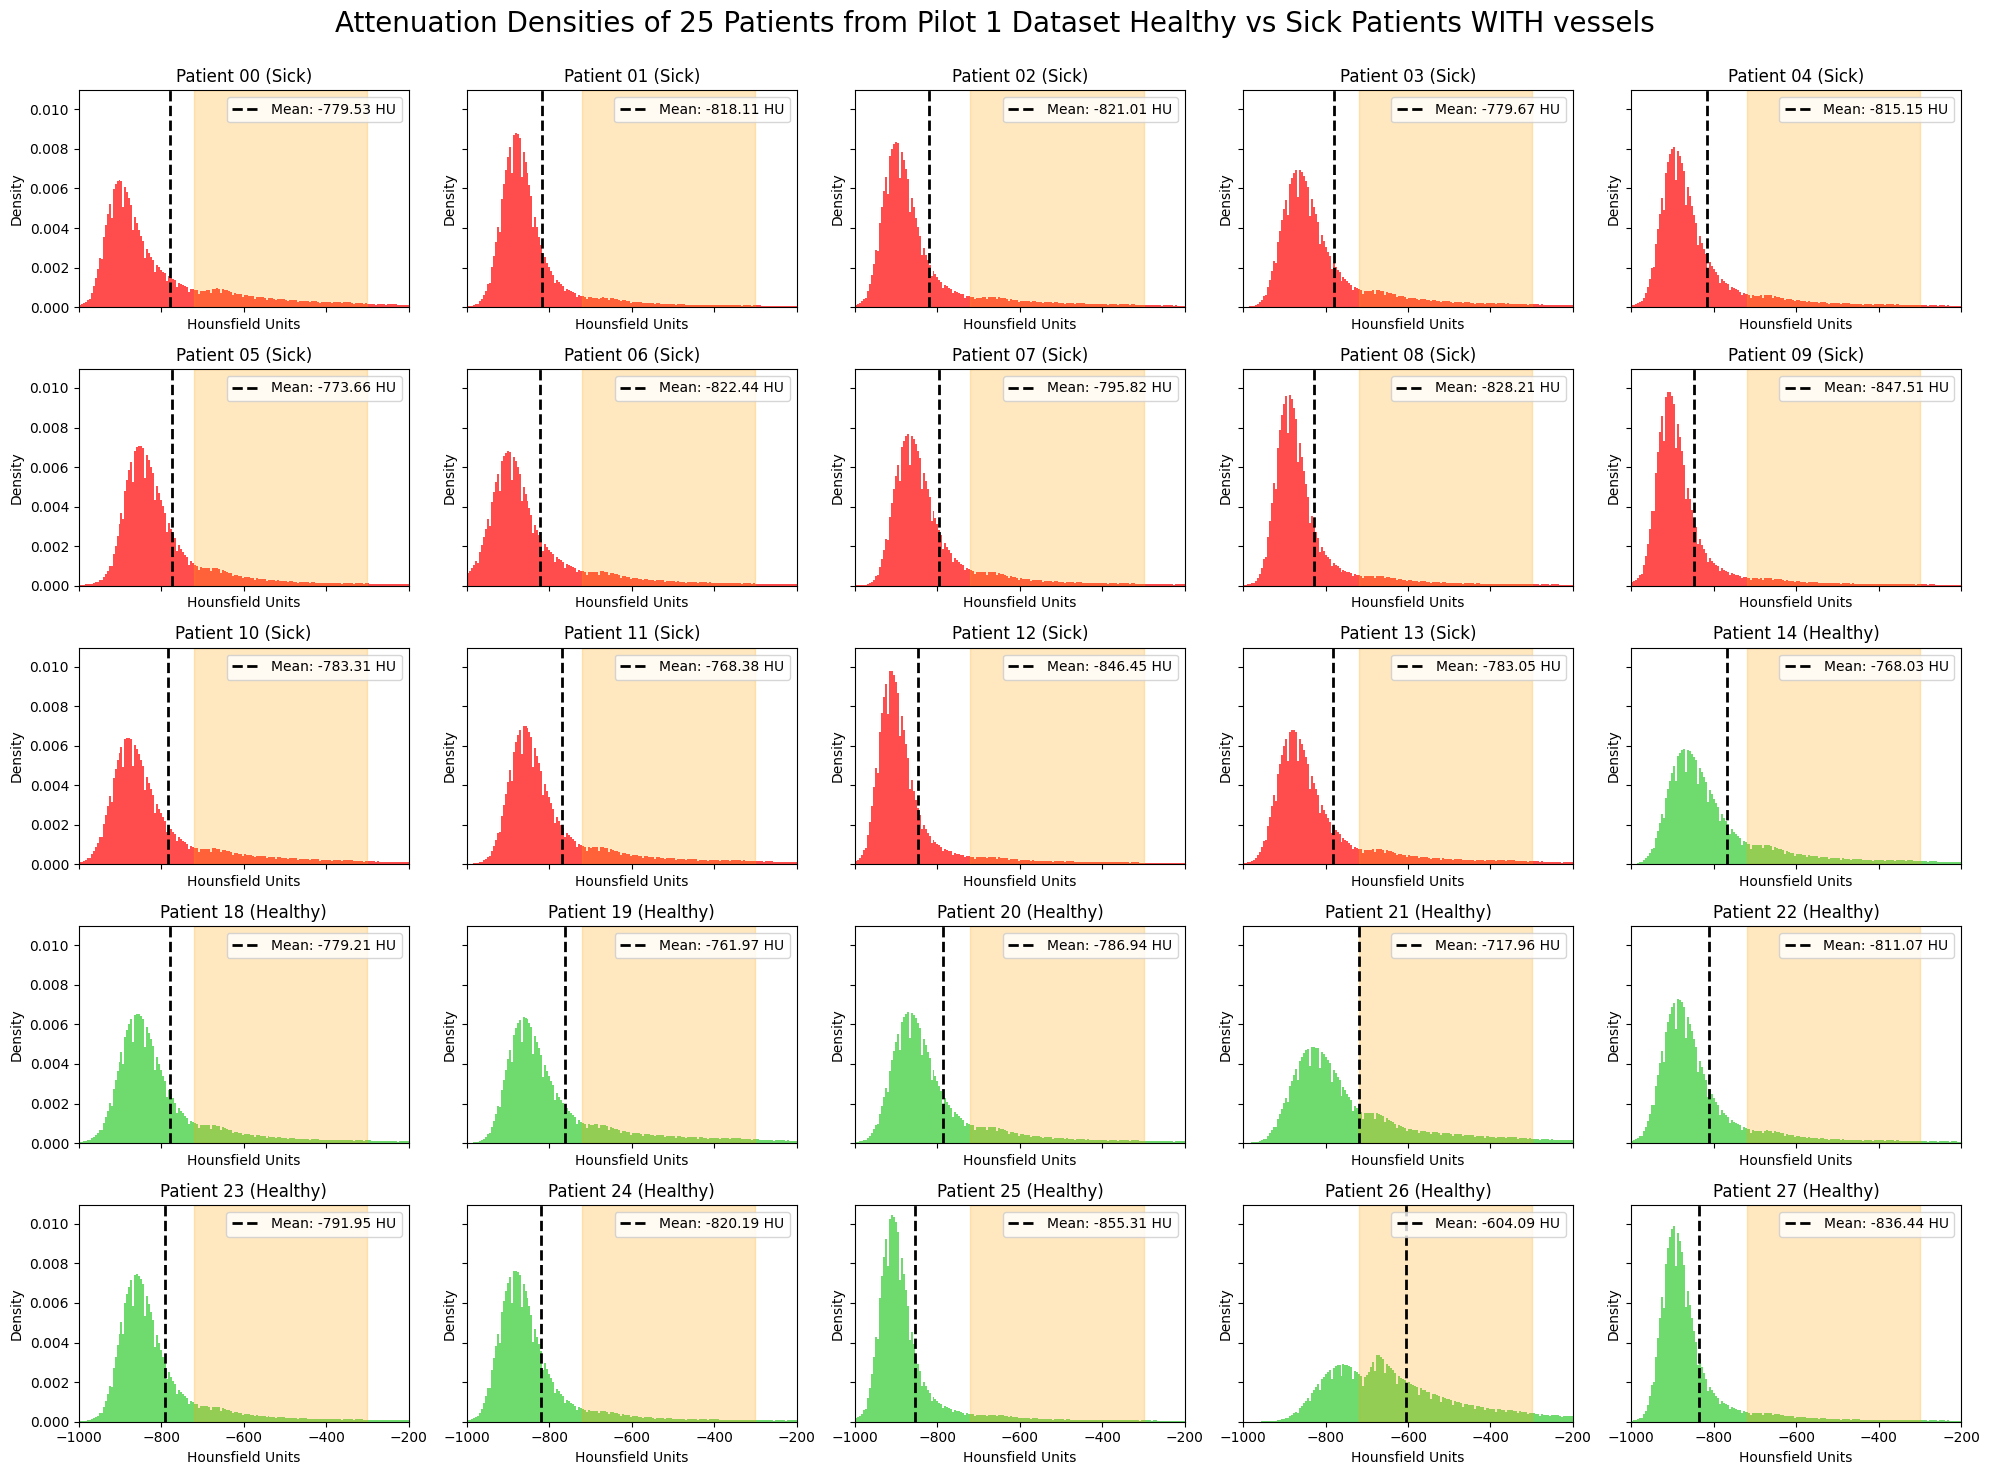

In [5]:
# Calculate the number of plots required (5 columns per row)
total_patients = len(df_with_vessels)
cols = 5
rows = (total_patients + cols - 1) // cols  # Round up to nearest whole row

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 3), sharex=True, sharey=True)

# Flatten axes to easily index into them
axes = axes.flatten()

# Define bins for all histograms
bins = np.linspace(-1000, 200, 250)

# Counter to track the subplot index
subplot_idx = 0

# Plot each patient's attenuation data
for _, row in df_with_vessels.iterrows():
    attenuation_data = row['Attenuation']
    patient_id = row['patient']
    label = row['label']
    color = 'limegreen' if label == 'healthy' else 'red'
    
    axes[subplot_idx].hist(attenuation_data, bins=bins, alpha=0.7, density=True, color=color)
    axes[subplot_idx].set_title(f"Patient {patient_id} ({label.capitalize()})")
    axes[subplot_idx].set_xlabel("Hounsfield Units")
    axes[subplot_idx].set_ylabel("Density")
    axes[subplot_idx].set_xlim(-1000, -200)
    axes[subplot_idx].axvspan(-720, -300, color='orange', alpha=0.25)
    mean_value = np.mean(attenuation_data)
    mean_line = axes[subplot_idx].axvline(mean_value, color='black', linestyle='--', linewidth=2)
    axes[subplot_idx].legend([mean_line],[f"Mean: {mean_value:.2f} HU"], loc="upper right")
    subplot_idx += 1

# Turn off unused axes
for i in range(subplot_idx, len(axes)):
    axes[i].axis('off')

plt.suptitle('Attenuation Densities of 25 Patients from Pilot 1 Dataset Healthy vs Sick Patients WITH vessels', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Investigating Attenuation densities without vessels

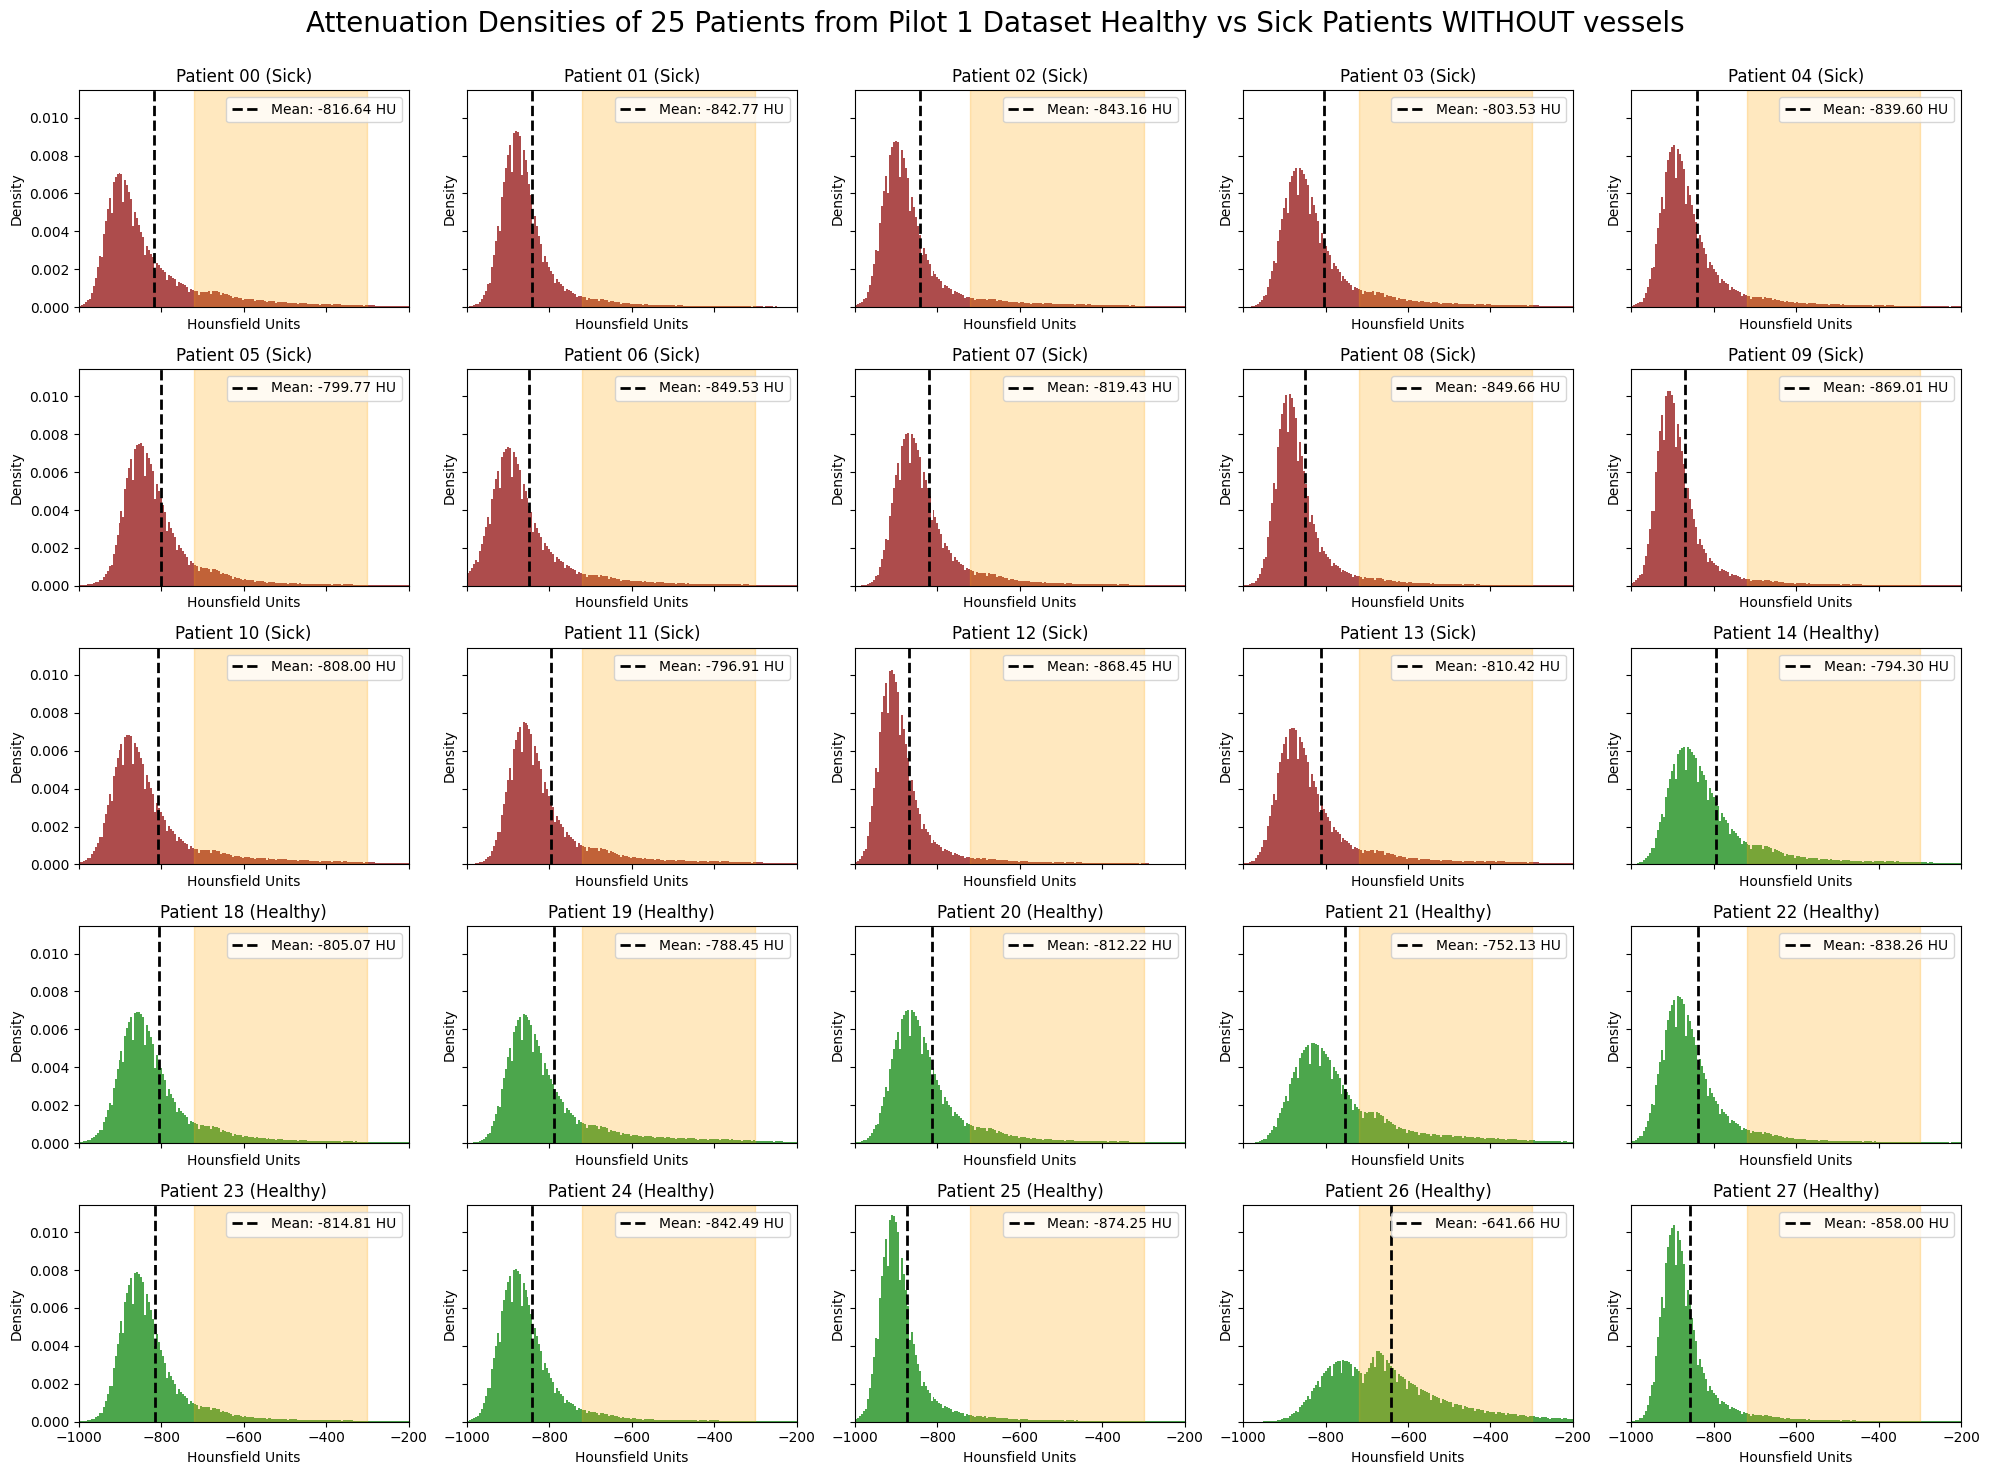

In [6]:
# Calculate the number of plots required (5 columns per row)
total_patients = len(df_wo)
cols = 5
rows = (total_patients + cols - 1) // cols  # Round up to nearest whole row

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 3), sharex=True, sharey=True)

# Flatten axes to easily index into them
axes = axes.flatten()

# Define bins for all histograms
bins = np.linspace(-1000, 200, 250)

# Counter to track the subplot index
subplot_idx = 0

# Plot each patient's attenuation data
for _, row in df_wo.iterrows():
    attenuation_data = row['Attenuation']
    patient_id = row['patient']
    label = row['label']
    color = 'green' if label == 'healthy' else 'darkred'
    
    axes[subplot_idx].hist(attenuation_data, bins=bins, alpha=0.7, density=True, color=color)
    axes[subplot_idx].set_title(f"Patient {patient_id} ({label.capitalize()})")
    axes[subplot_idx].set_xlabel("Hounsfield Units")
    axes[subplot_idx].set_ylabel("Density")
    axes[subplot_idx].set_xlim(-1000, -200)
    axes[subplot_idx].axvspan(-720, -300, color='orange', alpha=0.25)
    mean_value = np.mean(attenuation_data)
    mean_line = axes[subplot_idx].axvline(mean_value, color='black', linestyle='--', linewidth=2)
    axes[subplot_idx].legend([mean_line],[f"Mean: {mean_value:.2f} HU"], loc="upper right")
    subplot_idx += 1

# Turn off unused axes
for i in range(subplot_idx, len(axes)):
    axes[i].axis('off')

plt.suptitle('Attenuation Densities of 25 Patients from Pilot 1 Dataset Healthy vs Sick Patients WITHOUT vessels', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Comparison of subset of the attenuation of the lungs with and without vessels  

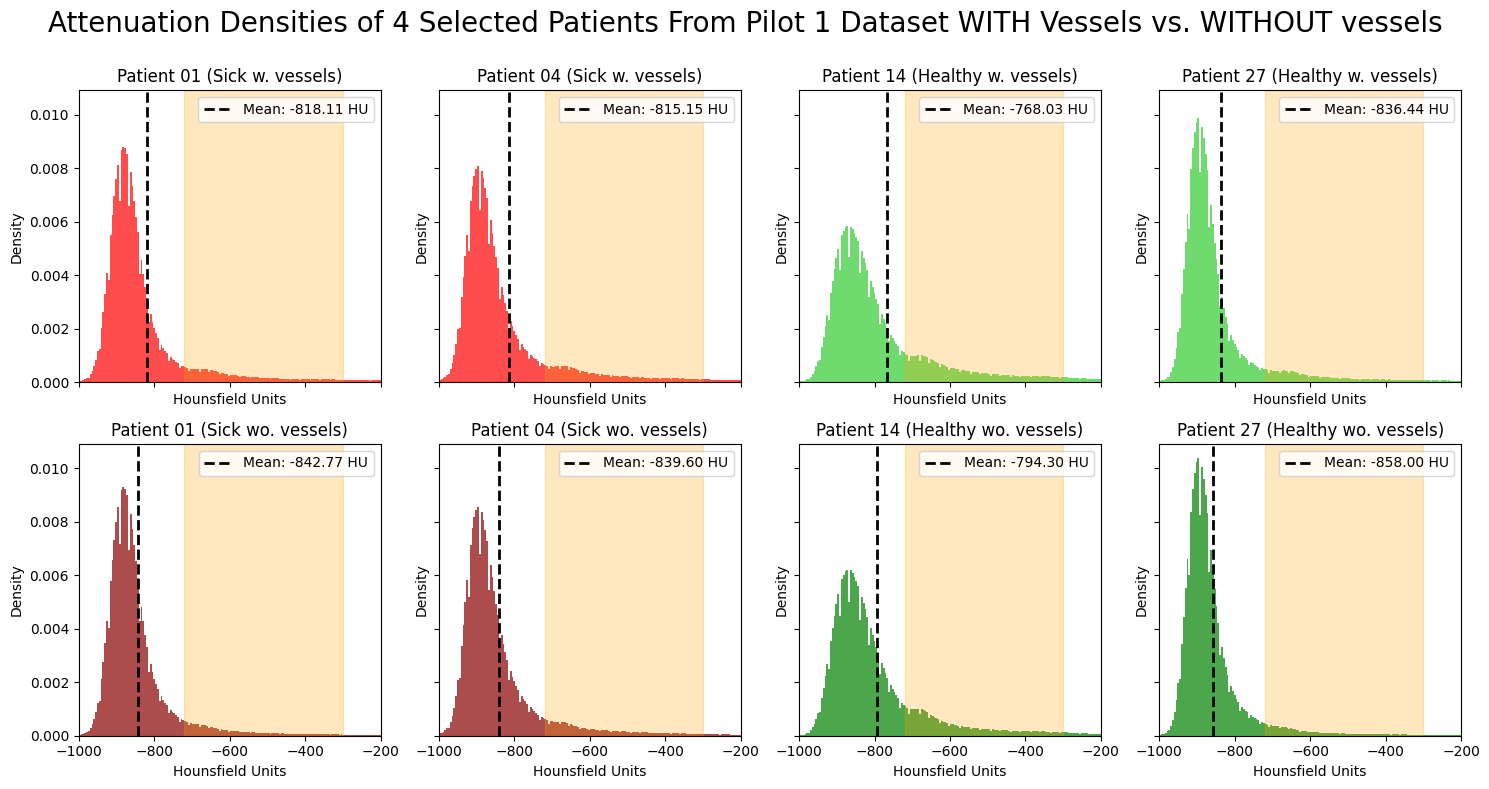

In [13]:
#Selected patients for comparison
df_with_vessels_subset = df_with_vessels.loc[[1,4,14,24]] # Select 3 patients for comparison
df_wo_subset = df_wo.loc[[1,4,14,24]]  # Select 3 patients for comparison

# Create a grid of subplots (2 rows: 5 healthy on top, 5 sick on the bottom)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), sharex=True, sharey=True)

# Flatten axes to easily index into them
axes = axes.flatten()

bins = np.linspace(-1000, 200, 250)

# Counter to track the subplot index
subplot_idx = 0


for _, row in df_with_vessels_subset.iterrows():
    attenuation_data = row['Attenuation']
    patient_id = row['patient']
    label = row['label']
    color = 'limegreen' if label == 'healthy' else 'red'
    axes[subplot_idx].hist(attenuation_data, bins=bins, alpha=0.7, density=True, color=color)
    axes[subplot_idx].set_title(f"Patient {patient_id} ({label.capitalize()} w. vessels)")
    axes[subplot_idx].set_xlabel("Hounsfield Units")
    axes[subplot_idx].set_ylabel("Density")
    axes[subplot_idx].set_xlim(-1000, -200)
    axes[subplot_idx].axvspan(-720, -300, color='orange', alpha=0.25)
    mean_value = np.mean(attenuation_data)
    mean_line = axes[subplot_idx].axvline(mean_value, color='black', linestyle='--', linewidth=2)
    axes[subplot_idx].legend([mean_line],[f"Mean: {mean_value:.2f} HU"], loc="upper right")
    subplot_idx += 1


for _, row in df_wo_subset.iterrows():
    attenuation_data = row['Attenuation']
    patient_id = row['patient']
    label = row['label']
    color = 'green' if label == 'healthy' else 'darkred'
    axes[subplot_idx].hist(attenuation_data, bins=bins, alpha=0.7, density=True, color=color)
    axes[subplot_idx].set_title(f"Patient {patient_id} ({label.capitalize()} wo. vessels)")
    axes[subplot_idx].set_xlabel("Hounsfield Units")
    axes[subplot_idx].set_ylabel("Density")
    axes[subplot_idx].set_xlim(-1000, -200)
    axes[subplot_idx].axvspan(-720, -300, color='orange', alpha=0.25)

    mean_value = np.mean(attenuation_data)
    mean_line = axes[subplot_idx].axvline(mean_value, color='black', linestyle='--', linewidth=2)
    axes[subplot_idx].legend([mean_line],[f"Mean: {mean_value:.2f} HU"], loc="upper right")
    subplot_idx += 1

plt.suptitle('Attenuation Densities of 4 Selected Patients From Pilot 1 Dataset WITH Vessels vs. WITHOUT vessels', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

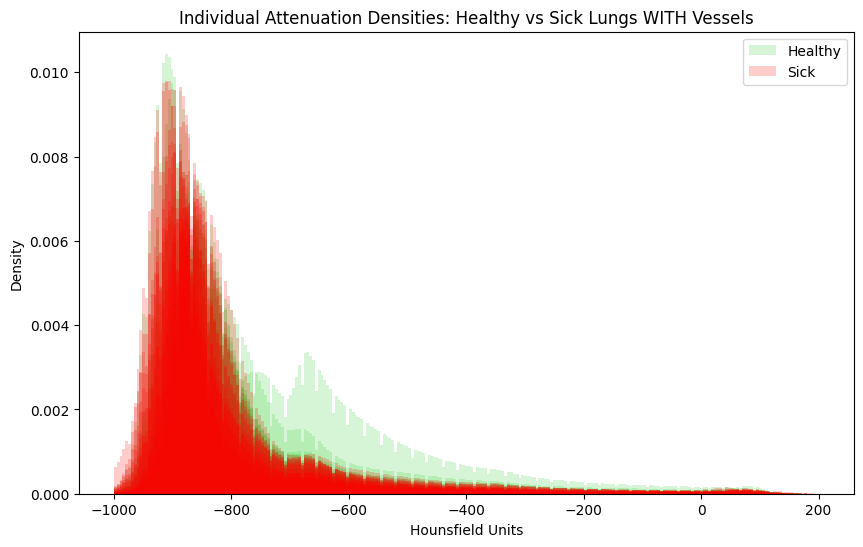

In [24]:
# Create the plot
plt.figure(figsize=(10, 6))

# Define a consistent range for Hounsfield Units (-1000 to +1000)
bins = np.linspace(-1000, 200, 250)

# Plot individual histograms for each healthy sample
for attenuation_data in df_with_vessels[df_with_vessels['label'] == 'healthy']['Attenuation']:
    plt.hist(attenuation_data, bins=bins, alpha=0.2, density=True, color='limegreen', label="Healthy" if 'Healthy' not in plt.gca().get_legend_handles_labels()[1] else "")
# Plot individual histograms for each sick sample
for attenuation_data in df_with_vessels[df_with_vessels['label'] == 'sick']['Attenuation']:
    plt.hist(attenuation_data, bins=bins, alpha=0.2, density=True, color='red', label="Sick" if 'Sick' not in plt.gca().get_legend_handles_labels()[1] else "")

# Add plot details
plt.title('Individual Attenuation Densities: Healthy vs Sick Lungs WITH Vessels')
plt.xlabel('Hounsfield Units')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

### This should probably not be used:

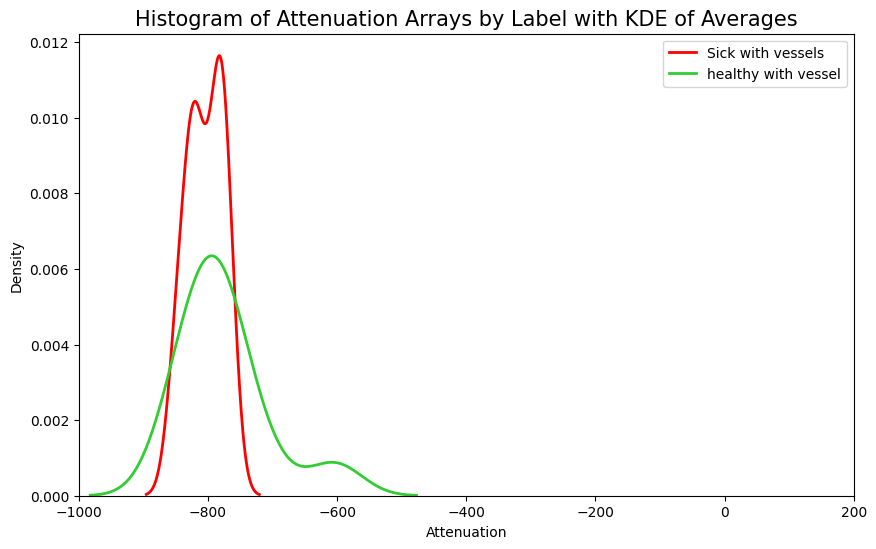

In [17]:
plt.figure(figsize=(10, 6))
#sns.histplot(df_expanded, x='attenuation', hue='label', element='step', stat='density', common_norm=False, palette='coolwarm')

sns.kdeplot(df_with_vessels[df_with_vessels['label'] == 'sick']['average_attenuation'], color='red', label='Sick with vessels', lw=2)
sns.kdeplot(df_with_vessels[df_with_vessels['label'] == 'healthy']['average_attenuation'], color='limegreen', label='healthy with vessel', lw=2)

plt.title('Histogram of Attenuation Arrays by Label with KDE of Averages', fontsize=15)
plt.xlim(-1000, 200)
plt.xlabel('Attenuation')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()